## Week 10 Instructor Led Lab: Data Reduction      
By: Dean Wilson  
Course: BGEN 632: Graduate Introduction to Python  
Date: 20250506  

In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# For confusion matrix
from sklearn.metrics import confusion_matrix

In [52]:
# set working directory
os.chdir("C:\\Users\\deanb\\OneDrive\\Desktop\\Python Graduate Class\\Week10\\week10labs-main\\data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\deanb\\OneDrive\\Desktop\\Python Graduate Class\\Week10\\week10labs-main\\data'

In [53]:
ch_df = pd.read_table('calihospital.txt') # Opening file
ch_df_pca = ch_df[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp',
                   'OperRev', 'OperInc', 'AvlBeds']]

In [54]:
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(ch_df_pca)

pca_result = pca(n_components=7).fit(scaled_data)

In [55]:
# obtain eigenvalues - focus on the output
pca_result.explained_variance_

array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91419641e-22])

### Results From PCA
* Component 1 and 2 are the only components above 1.0 value (5.7213 and 1.0765), hence these should be the only two components we keep and throw the others away since they contribute less varaiance than one standardized variable. 

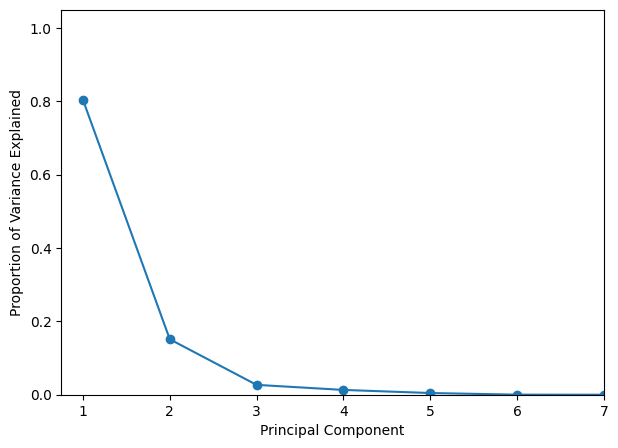

In [56]:
# run the PCA 
pca_result = pca(n_components=7).fit(scaled_data)

# generate scree plot - focus on the output
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
plt.xlim(0.75,4.25) 
plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7,])

plt.show()

### Scree Plot Results
* The plot shows that the first two components are in a steep decline in the curve, indicating the most influence. These two components should be used for analysis, while the other components are in the "leveling off" line, indicating they should not be used. This aligns the PCA results 

### K-means Clusters

In [57]:
# use 3 clusters
km_3 = cls.KMeans(n_clusters=3, random_state=0).fit(scaled_data) # Chat GPT assisted with me on this, I was a bit confused since the examples from the tutorial were for categorical (converted) and there is not categorical data in this.

# assigned clusters
km_3.labels_ # I choose 3, based off of the PCA plot graph. I believe 2 would have been  sufficient, but 3 would have ensured it captured meaningful sub groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1], dtype=int32)

### Creating Confusion Matricies 

In [58]:
ch_df['cluster'] = km_3.labels_ # Creating a column named cluster for the confusion matrix

In [59]:
ch_df['Teaching'] = ch_df['Teaching'].astype('category').cat.codes # Turning teaching category into a 0 or 1 category 0= small/rural and 1 = teaching

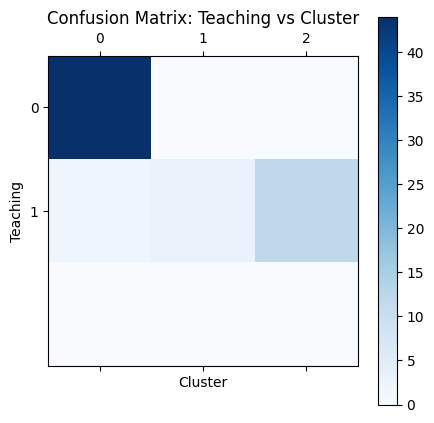

In [63]:
cm = confusion_matrix(ch_df['Teaching'], ch_df['cluster']) # Creating the confusion matrix

plt.figure(figsize=(5,5)) # Create a 5 inch by 5 inch figure
plt.matshow(cm, cmap='Blues', fignum=1) #Display confusion matrix as a blue color coded grid (darker shades of blue = higher count)
plt.title('Confusion Matrix: Teaching vs Cluster') # Title
plt.xlabel('Cluster') # X axis label
plt.ylabel('Teaching') # y axis label
plt.xticks([0, 1, 2]) # utilized 3 clusters earlier
plt.yticks([0, 1]) # only 2 categories in this data set
plt.colorbar() # add color scale legend

In [41]:
ch_df['TypeControl'] = ch_df['TypeControl'].astype('category').cat.codes # Turning TypeControl category into a 0, 1, 2, 3 category 0= City/Count, 1 = District, 2= Investor, 3= Non Profit

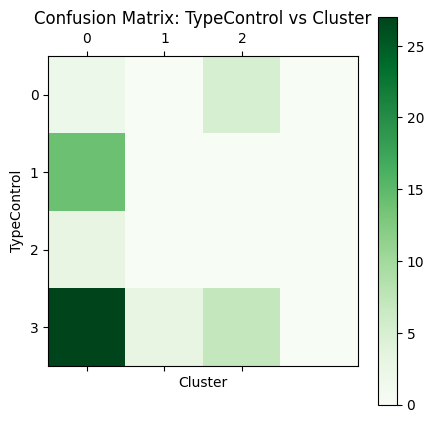

In [43]:
cm = confusion_matrix(ch_df['TypeControl'], ch_df['cluster']) # Creating the confusion matrix

plt.figure(figsize=(5,5)) # Create a 5 inch by 5 inch figure
plt.matshow(cm, cmap='Greens', fignum=1) #Display confusion matrix as a green color coded grid (darker shades  = higher count)
plt.title('Confusion Matrix: TypeControl vs Cluster') # Title
plt.xlabel('Cluster') # X axis label
plt.ylabel('TypeControl') # y axis label
plt.xticks([0, 1, 2]) # utilized 3 clusters earlier
plt.yticks([0, 1, 2, 3]) # only 4 categories in this data set
plt.colorbar() # add color scale legend

In [44]:
ch_df['DonorType'] = ch_df['DonorType'].astype('category').cat.codes # Turning DonorType category into a 0, or 1, 0= Alumni and 1 = Charity

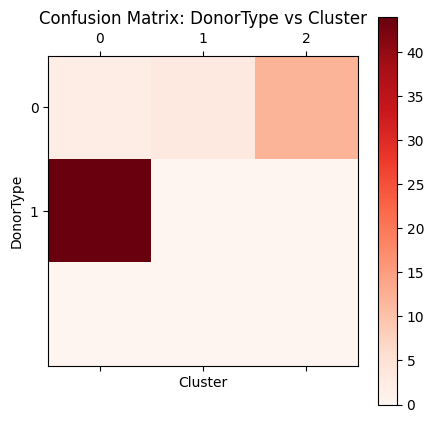

In [46]:
cm = confusion_matrix(ch_df['DonorType'], ch_df['cluster']) # Creating the confusion matrix

plt.figure(figsize=(5,5)) # Create a 5 inch by 5 inch figure
plt.matshow(cm, cmap='Reds', fignum=1) #Display confusion matrix as a red color coded grid (darker shades  = higher count)
plt.title('Confusion Matrix: DonorType vs Cluster') # Title
plt.xlabel('Cluster') # X axis label
plt.ylabel('DonorType') # y axis label
plt.xticks([0, 1, 2]) # utilized 3 clusters earlier
plt.yticks([0, 1]) # only 2 categories in this data set
plt.colorbar() # add color scale legend

### Results from Confusion Matrix
* I believe the Teaching and DonorType were very comprable but DonorType appears to have just a bit more seperation. In DonorType we see that most charity donors are in cluster 0 and most alumni donors are grouped in cluster 2. This suggests that the KMeans differentiated the hospitals based on donor type

### References
* OpenAI. (2025, May 7). Chat with ChatGPT: Vietnam War novel identification [Large language model]. ChatGPT. https://chatgpt.com/share/681b9521-d048-8001-adb8-f8c87ce4d1f3